# WeatherPy

   Analysis

1. From the Temperature vs Latitude as we go closer to the equator thr temperature is getting hotter and as we go towards to      the northpole the temperature is cooler.

2. We can't find any correlation between the Latitude and Humidity or couldiness or Windspeed.

3. A more Histroic data helped to show the relationship better. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
import requests
import time

!pip install citipy

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#import the image for the plot
img = mpimg.imread('../Images/Lat_Long_Map_HR.png')


  Using cached https://files.pythonhosted.org/packages/3b/d0/59721d0f3954781488aac17ee4a40412d0a3547e98bb16377a09c39a2807/citipy-0.0.5.tar.gz
  Using cached https://files.pythonhosted.org/packages/00/3d/bd727d025b1706798aae14da3f69fc7d5a8639dc9e0eba37c7dcd43eb03e/kdtree-0.16-py2.py3-none-any.whl
  Stored in directory: C:\Users\13157\AppData\Local\pip\Cache\wheels\6f\07\0d\0392639cf1c10376f59decd06775c0e085ca2458c6036c1028
Successfully built citipy


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
cities = set(cities) 
len(cities)
print(cities)

{'aloleng', 'kavieng', 'puerto el triunfo', 'sao jose da coroa grande', 'chabahar', 'ketchikan', 'dandong', 'maniitsoq', 'santa isabel do rio negro', 'taolanaro', 'sao geraldo do araguaia', 'mogeiro', 'nautla', 'tabuk', 'mayya', 'carutapera', 'buford', 'illoqqortoormiut', 'coahuayana', 'maseru', 'kokomo', 'peleduy', 'lewistown', 'auki', 'guerrero negro', 'ilulissat', 'osmena', 'sorland', 'alice', 'vostok', 'ancud', 'kazalinsk', 'esil', 'broken hill', 'tiksi', 'east london', 'qibili', 'hovd', 'teya', 'honiara', 'lat yao', 'grao mogol', 'weare', 'leningradskiy', 'brenham', 'ribeira grande', 'hong gai', 'nuuk', 'chara', 'naqadeh', 'kaitangata', 'rikitea', 'rundu', 'tsihombe', 'beloha', 'ukiah', 'ust-kuyga', 'taoudenni', 'bilma', 'bam', 'bida', 'tanout', 'tera', 'chauk', 'gastonia', 'meyungs', 'sao filipe', 'pokrovsk-uralskiy', 'tessalit', 'caravelas', 'longyan', 'los llanos de aridane', 'dunedin', 'houma', 'mar del plata', 'iralaya', 'belyy yar', 'zwedru', 'deputatskiy', 'manokwari', 'waj

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"


# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# set up lists to hold reponse info
lat = []
lng = []
temp = []
humidity = []
windSpeed= []
count_Cities = 1
couldiness =[]
city_Found =[]

response = requests.get(query_url + city).json()
response

#Loop through the list of cities and perform a request for data on each
for city in cities:
    
    
    response = requests.get(query_url + city).json()
    if response['cod']==200:
        
        city_Found.append(city)
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        windSpeed.append(response['wind']['speed'])
        couldiness.append(response['clouds']['all'])
        print(f"city found {count_Cities} | {city}  ")
       
        count_Cities = count_Cities + 1
    else:
        print("City not found. Skipping...")

print(f"The latitude information received is: {lat}")
print(f"The longitude information received is: {lng}")
print(f"The temperature information received is: {temp}")
print(f"The humidity information received is: {humidity}")
print(f"The windspeed information received is: {windSpeed}")
print(f"The couldiness information received is: {couldiness}")

city found 1 | aloleng  
city found 2 | kavieng  
city found 3 | puerto el triunfo  
city found 4 | sao jose da coroa grande  
city found 5 | chabahar  
city found 6 | ketchikan  
city found 7 | dandong  
city found 8 | maniitsoq  
city found 9 | santa isabel do rio negro  
City not found. Skipping...
city found 10 | sao geraldo do araguaia  
city found 11 | mogeiro  
city found 12 | nautla  
city found 13 | tabuk  
city found 14 | mayya  
city found 15 | carutapera  
city found 16 | buford  
City not found. Skipping...
city found 17 | coahuayana  
city found 18 | maseru  
city found 19 | kokomo  
city found 20 | peleduy  
city found 21 | lewistown  
city found 22 | auki  
city found 23 | guerrero negro  
city found 24 | ilulissat  
city found 25 | osmena  
city found 26 | sorland  
city found 27 | alice  
city found 28 | vostok  
city found 29 | ancud  
City not found. Skipping...
city found 30 | esil  
city found 31 | broken hill  
city found 32 | tiksi  
city found 33 | east london 

city found 264 | garissa  
city found 265 | linhares  
city found 266 | narsaq  
city found 267 | north bend  
city found 268 | zhuhai  
city found 269 | khatanga  
city found 270 | san quintin  
city found 271 | sovetskaya gavan  
city found 272 | atasu  
city found 273 | maltahohe  
city found 274 | rio grande  
city found 275 | havoysund  
city found 276 | paso de los toros  
city found 277 | songkhla  
city found 278 | sao joao da barra  
city found 279 | leh  
city found 280 | sobolevo  
city found 281 | oranjemund  
city found 282 | beira  
city found 283 | belmonte  
city found 284 | panaba  
city found 285 | wilmington  
city found 286 | gouyave  
city found 287 | bosaso  
city found 288 | norman wells  
City not found. Skipping...
city found 289 | dezful  
city found 290 | jamestown  
city found 291 | axim  
city found 292 | fairbanks  
city found 293 | san lorenzo  
city found 294 | sambava  
city found 295 | iqaluit  
city found 296 | esperance  
city found 297 | yantzaza  


city found 522 | abu dhabi  
City not found. Skipping...
city found 523 | riohacha  
city found 524 | aykhal  
city found 525 | ballina  
City not found. Skipping...
city found 526 | margate  
city found 527 | kudahuvadhoo  
city found 528 | myitkyina  
city found 529 | mehamn  
city found 530 | bonfim  
city found 531 | chake chake  
City not found. Skipping...
city found 532 | mantua  
city found 533 | grootfontein  
city found 534 | arinos  
city found 535 | luanda  
city found 536 | nayoro  
city found 537 | kruisfontein  
city found 538 | ossora  
city found 539 | hobart  
city found 540 | letnik  
city found 541 | vestmannaeyjar  
city found 542 | oriximina  
city found 543 | reitz  
city found 544 | cardston  
city found 545 | hendersonville  
city found 546 | biak  
city found 547 | mayumba  
city found 548 | katsuura  
city found 549 | teufen  
city found 550 | mount gambier  
City not found. Skipping...
The latitude information received is: [16.13, -2.57, 13.27, -8.9, 25.29, 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
WeatherPy_dict = {
    "City":city_Found,
    "Lat":lat,
    "Lng":lng,
    "Temp":temp,
    "Humidity":humidity,
    "WindSpeed":windSpeed,
    "Cloudiness":couldiness,
    }



In [5]:
# naming a dataframe
Weatherpy_dataframe = pd.DataFrame(WeatherPy_dict)
Weatherpy_dataframe.head()

,City,Lat,Lng,Temp,Humidity,WindSpeed,Cloudiness
0,aloleng,16.13,119.78,83.58,79,20.24,100
1,kavieng,-2.57,150.80,82.84,74,9.44,81
2,puerto el triunfo,13.27,-88.55,80.60,88,2.24,20
3,sao jose da coroa grande,-8.90,-35.15,69.65,95,3.33,58
4,chabahar,25.29,60.65,81.42,81,1.30,0


In [6]:
Weatherpy_dataframe.count()

City          550
Lat           550
Lng           550
Temp          550
Humidity      550
WindSpeed     550
Cloudiness    550
dtype: int64

In [7]:
#city data into a .csv.
Weatherpy_dataframe.to_csv(output_data_file) 

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

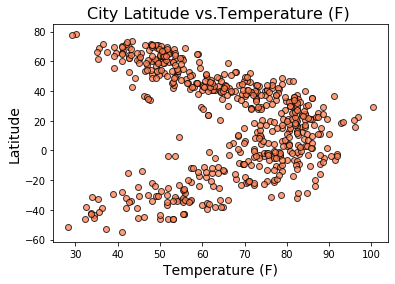

In [8]:
#plt.imshow(img,origin='higher')
plt.scatter(Weatherpy_dataframe["Temp"],Weatherpy_dataframe["Lat"],edgecolors="black",facecolors="coral",
            alpha = 0.75,linewidth = 1.0)
plt.show

plt.title(f"City Latitude vs.Temperature (F) ", fontsize=16)
plt.xlabel('Temperature (F)', fontsize=14)
plt.ylabel('Latitude', fontsize=14)

#defining size for the graph
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8.5
plt.rcParams["figure.figsize"] = fig_size


#save as a image
plt.savefig("../Images/City Latitude vs.Temperature (F).png")
plt.show()

# Latitude vs. Humidity Plot

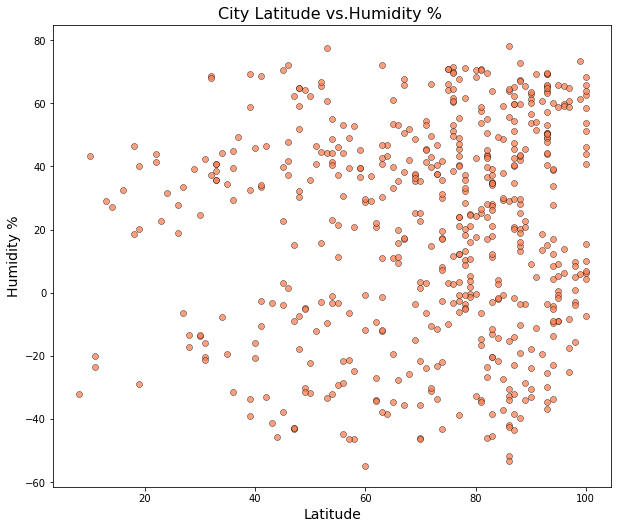

In [9]:
plt.scatter(Weatherpy_dataframe["Humidity"],Weatherpy_dataframe["Lat"],edgecolors="black",facecolors="coral",
            alpha = 0.75,linewidth = 0.5)
plt.show

plt.title(f"City Latitude vs.Humidity % ", fontsize=16)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Humidity %', fontsize=14)

#save as a image
plt.savefig("../Images/Humidity %.png")
plt.show()

#### Latitude vs. Cloudiness Plot

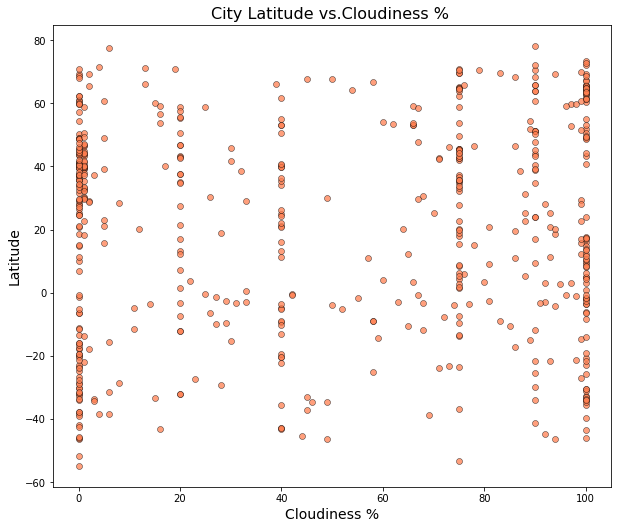

In [10]:
plt.scatter(Weatherpy_dataframe["Cloudiness"],Weatherpy_dataframe["Lat"],edgecolors="black",facecolors="coral",
            alpha = 0.75,linewidth = 0.5)

plt.title(f"City Latitude vs.Cloudiness % ", fontsize=16)
plt.xlabel('Cloudiness %', fontsize=14)
plt.ylabel('Latitude', fontsize=14)

#save as a image
plt.savefig("../Images/Cloudiness %.png")
plt.show()

#### Latitude vs. Wind Speed Plot

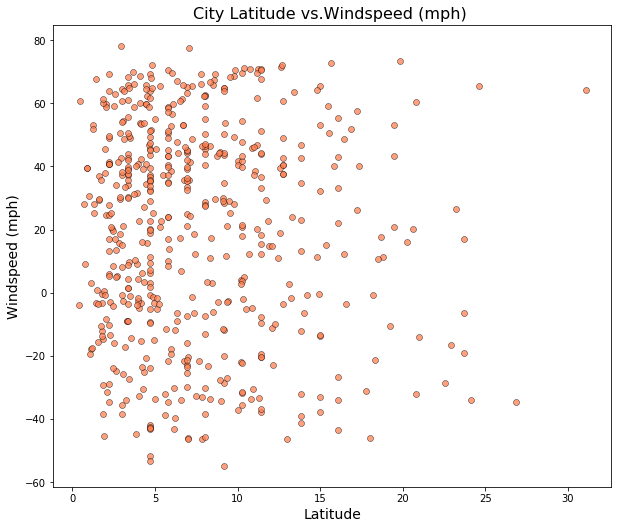

In [11]:
plt.scatter(Weatherpy_dataframe["WindSpeed"],Weatherpy_dataframe["Lat"],edgecolors="black",facecolors="coral",
            alpha = 0.75,linewidth = 0.5)

plt.title(f"City Latitude vs.Windspeed (mph) ", fontsize=16)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Windspeed (mph)', fontsize=14)

#save as a image
plt.savefig("../Images/Windspeed (mph).png")
plt.show()